In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# 1. Problem Statement

We have a data of dignoses of heart disease patients. Have to build a machine learning model that detect whether a patient has heart disease or not.

# 2. Data Gathering

In [3]:
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3. EDA

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot: >

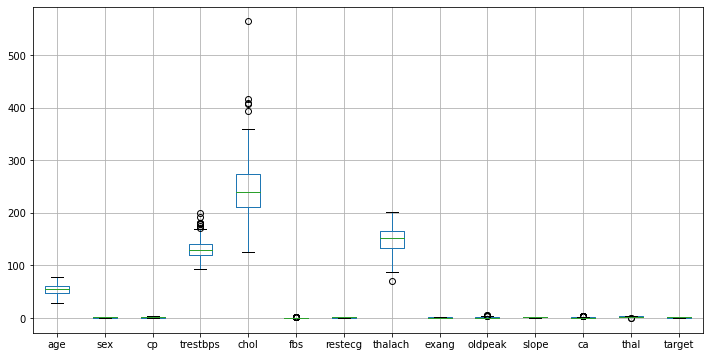

In [8]:
plt.figure(figsize=(12,6))
df.boxplot()

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# 4. Feature Engineering

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### age

<AxesSubplot: xlabel='age'>

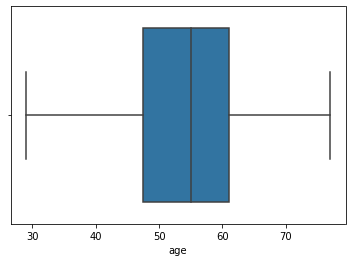

In [11]:
sns.boxplot(x = df["age"])

##### sex

<AxesSubplot: xlabel='sex'>

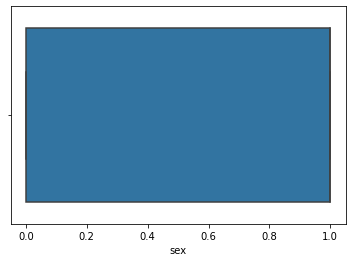

In [12]:
sns.boxplot(x = df["sex"])

##### cp

<AxesSubplot: xlabel='cp'>

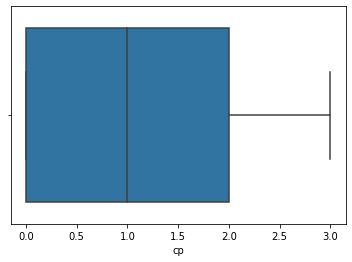

In [13]:
sns.boxplot(x = df["cp"])

##### trestbps

<AxesSubplot: xlabel='trestbps'>

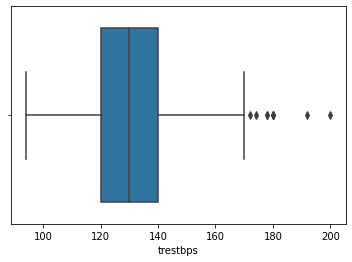

In [14]:
sns.boxplot(x = df["trestbps"])

<AxesSubplot: >

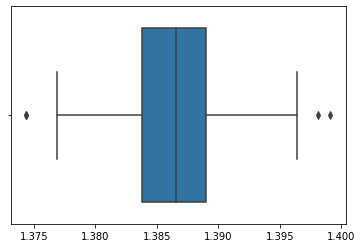

In [15]:
sns.boxplot(x = boxcox(df["trestbps"])[0])

<AxesSubplot: xlabel='trestbps'>

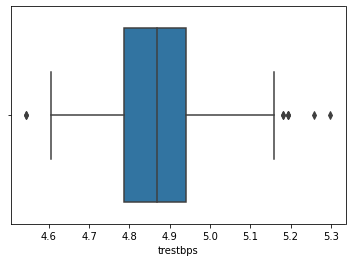

In [16]:
sns.boxplot(x = np.log(df["trestbps"]))

In [17]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

170.0

In [18]:
df.loc[df['trestbps'] >= upper_tail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


<AxesSubplot: xlabel='trestbps'>

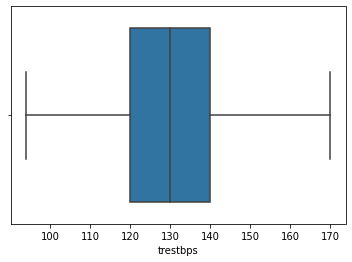

In [19]:
df['trestbps'] = np.where(df['trestbps'] >= upper_tail, upper_tail, df['trestbps'])
sns.boxplot(x = df['trestbps'])

In [20]:
df.loc[df['trestbps'] == upper_tail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,170.0,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,170.0,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,170.0,325,0,1,154,1,0.0,2,0,2,1
152,64,1,3,170.0,227,0,0,155,0,0.6,1,0,3,1
195,59,1,0,170.0,326,0,0,140,1,3.4,0,0,3,0
203,68,1,2,170.0,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,170.0,288,1,0,133,1,4.0,0,2,3,0
228,59,1,3,170.0,288,0,0,159,0,0.2,1,0,3,0
241,59,0,0,170.0,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,170.0,283,0,0,195,0,0.0,2,1,3,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


##### chol

<AxesSubplot: xlabel='chol'>

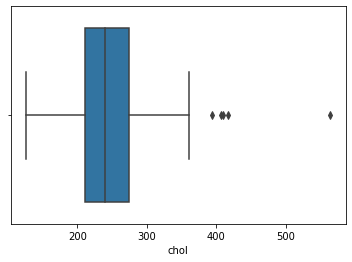

In [22]:
sns.boxplot(x = (df["chol"]))

<AxesSubplot: xlabel='chol', ylabel='Density'>

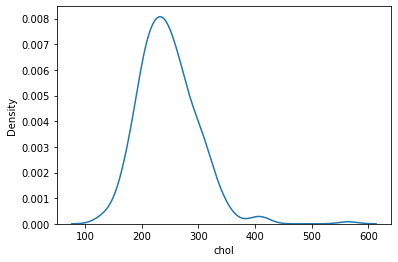

In [23]:
sns.kdeplot(df["chol"])

In [24]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

369.75

<AxesSubplot: xlabel='chol'>

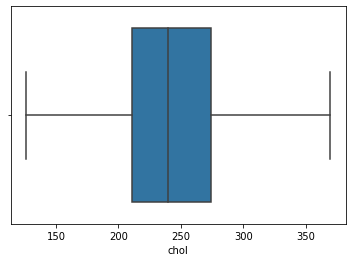

In [25]:
df['chol'] = np.where(df['chol'] >= upper_tail, upper_tail, df['chol'])
sns.boxplot(x = df['chol'])

##### fbs

<AxesSubplot: xlabel='fbs', ylabel='Density'>

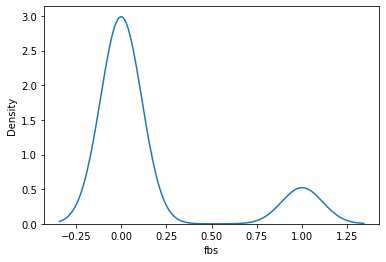

In [26]:
sns.kdeplot(df["fbs"])

<AxesSubplot: xlabel='fbs'>

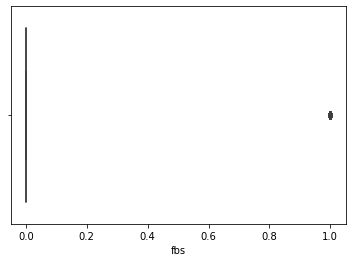

In [27]:
sns.boxplot(x = (df["fbs"]))   #no any transormation technique works

In [28]:
q1 = df['fbs'].quantile(0.25)
q3 = df['fbs'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

0.0

<AxesSubplot: xlabel='fbs'>

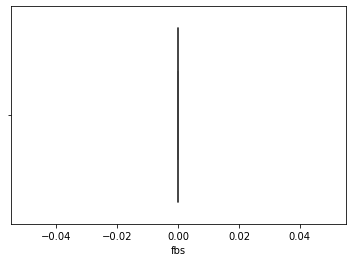

In [29]:
df['fbs'] = np.where(df['fbs'] >= upper_tail, upper_tail, df['fbs'])
sns.boxplot(x = df['fbs'])

##### thalach

<AxesSubplot: xlabel='thalach'>

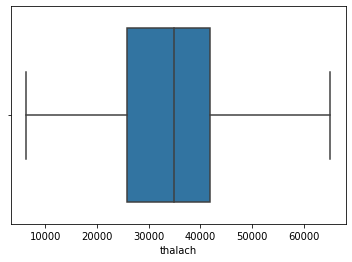

In [30]:
df["thalach"] = boxcox(df["thalach"])[0]
sns.boxplot(x =df["thalach"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


<AxesSubplot: >

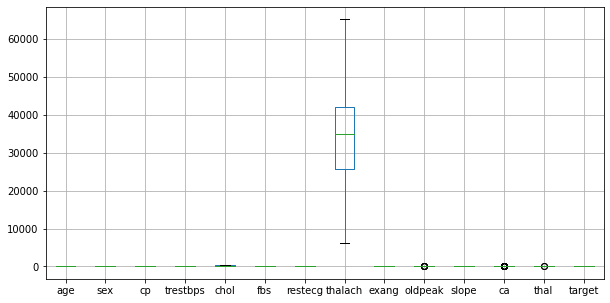

In [32]:
plt.figure(figsize=(10,5))
df.boxplot()

##### oldpeak

<AxesSubplot: xlabel='oldpeak', ylabel='Density'>

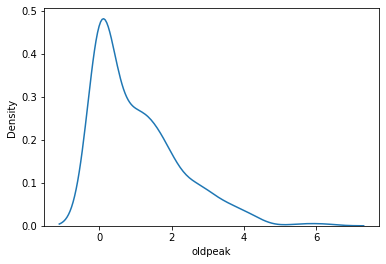

In [33]:
sns.kdeplot(df['oldpeak'])

In [34]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

4.0

<AxesSubplot: xlabel='oldpeak'>

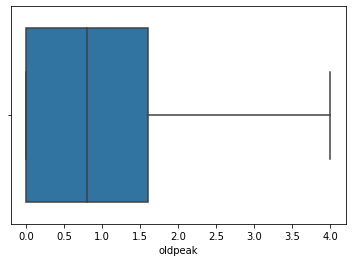

In [35]:
df['oldpeak'] = np.where(df['oldpeak']>=upper_tail, upper_tail, df['oldpeak'])
sns.boxplot(x= df['oldpeak'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


<AxesSubplot: >

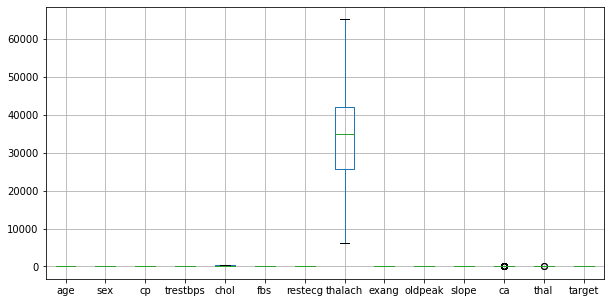

In [37]:
plt.figure(figsize=(10,5))
df.boxplot()

##### ca

<AxesSubplot: xlabel='ca'>

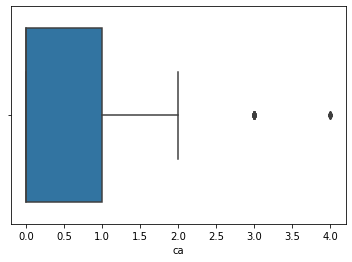

In [38]:
sns.boxplot(x = df["ca"])

In [39]:
q1 = df['ca'].quantile(0.25)
q3 = df['ca'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
upper_tail

2.5

<AxesSubplot: xlabel='ca'>

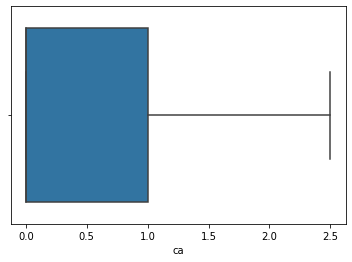

In [40]:
df['ca'] = np.where(df['ca']>=upper_tail, upper_tail, df['ca'])
sns.boxplot(x= df['ca'])

##### thal

<AxesSubplot: xlabel='thal'>

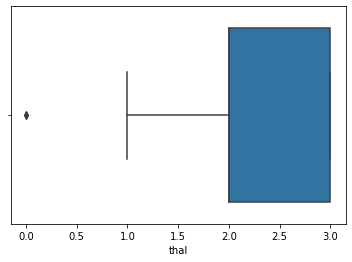

In [41]:
sns.boxplot(x = df["thal"])

In [42]:
q1 = df['thal'].quantile(0.25)
q3 = df['thal'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
lower_tail

0.5

<AxesSubplot: xlabel='thal'>

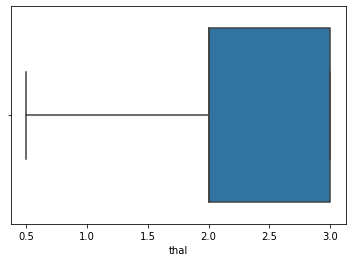

In [43]:
df['thal'] = np.where(df['thal']<=lower_tail, lower_tail, df['thal'])
sns.boxplot(x= df['thal'])

# 5. Feature Selection

#### No Multicolinearity

In [44]:
x = df.drop('target',axis = 1)

<AxesSubplot: >

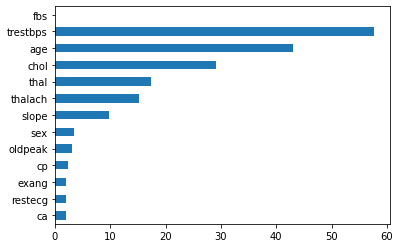

In [45]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))

s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = 'barh')

### 5.1 Normalization

### 5.2 Standardization

# 6. Model Training

#### 6.1 Train Test Split

In [77]:
x = df.drop('target',axis = 1)
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=22, stratify=y)

In [78]:
y_train.value_counts()

1    132
0    110
Name: target, dtype: int64

In [79]:
y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

In [80]:
132/242

0.5454545454545454

In [81]:
33/61

0.5409836065573771

#### 6.2 Model Instantiation

#### 1. Logistic Model

In [82]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

In [83]:
def evaluation_metric(a,b):
    cnf_matrix = confusion_matrix(a,b)
    print("Confusion Matrix: \n",cnf_matrix)
    print("*"*40)
    accuracy = accuracy_score(a,b)
    print("Accuracy is :",accuracy)
    print("*"*40)

    clf_report = classification_report(a,b)
    print("Classification Report :\n",clf_report)


# 7. Evaluation

#### 7.1 Evaluation on Testing 

In [84]:
y_pred_test = logistic_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test)

Confusion Matrix: 
 [[16 12]
 [ 3 30]]
****************************************
Accuracy is : 0.7540983606557377
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.71      0.91      0.80        33

    accuracy                           0.75        61
   macro avg       0.78      0.74      0.74        61
weighted avg       0.77      0.75      0.75        61



In [85]:
def evaluation_metric(a,b):
    cnf_matrix = confusion_matrix(a,b)
    print("Confusion Matrix: \n",cnf_matrix)
    print("*"*40)
    accuracy = accuracy_score(a,b)
    print("Accuracy is :",accuracy)
    print("*"*40)

    clf_report = classification_report(a,b)
    print("Classification Report :\n",clf_report)


0.7540983606557377

#### 7.2 Evaluation on Training Dataset

In [86]:
y_pred_train = logistic_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train)

Confusion Matrix: 
 [[ 87  23]
 [ 13 119]]
****************************************
Accuracy is : 0.8512396694214877
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       110
           1       0.84      0.90      0.87       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [87]:
logistic_train_acc = logistic_clf.score(x_train, y_train)
logistic_train_acc

0.8512396694214877

### 2. Ridge Classifier

In [88]:
ridge_clf = RidgeClassifier()
ridge_clf.fit(x_train, y_train)

RidgeClassifier()

In [89]:
y_pred_test_ridge = ridge_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test_ridge)

Confusion Matrix: 
 [[18 10]
 [ 0 33]]
****************************************
Accuracy is : 0.8360655737704918
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.77      1.00      0.87        33

    accuracy                           0.84        61
   macro avg       0.88      0.82      0.83        61
weighted avg       0.87      0.84      0.83        61



In [90]:
ridge_test_acc = ridge_clf.score(x_test, y_test)
ridge_test_acc

0.8360655737704918

In [91]:
y_pred_train_ridge = ridge_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train_ridge)

Confusion Matrix: 
 [[ 84  26]
 [ 10 122]]
****************************************
Accuracy is : 0.8512396694214877
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       110
           1       0.82      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.86      0.85      0.85       242



In [92]:
ridge_train_acc = ridge_clf.score(x_train, y_train)
ridge_train_acc

0.8512396694214877

### 3. KNN Algorithm

In [93]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

#### Evaluation on KNN testing dataset 

In [94]:
y_pred_test_knn = knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test_knn)

Confusion Matrix: 
 [[16 12]
 [11 22]]
****************************************
Accuracy is : 0.6229508196721312
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.65      0.67      0.66        33

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



In [95]:
knn_test_acc = knn_clf.score(x_test, y_test)
knn_test_acc

0.6229508196721312

#### Evaluation on KNN training dataset

In [96]:
y_pred_train_knn = knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train_knn)

Confusion Matrix: 
 [[ 75  35]
 [ 27 105]]
****************************************
Accuracy is : 0.743801652892562
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       110
           1       0.75      0.80      0.77       132

    accuracy                           0.74       242
   macro avg       0.74      0.74      0.74       242
weighted avg       0.74      0.74      0.74       242



In [97]:
knn_train_acc = knn_clf.score(x_train, y_train)
knn_train_acc

0.743801652892562

### 4. Hyperparameter tuning on KNN Algorithm

In [98]:
knn_model = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors' : np.arange(3,20),
    'p' : [1,2]
        }

gscv_knn_model = GridSearchCV(knn_model, hyperparameters, cv = 3)
gscv_knn_model.fit(x_train, y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=18, p=1)

In [99]:
knn_clf1 = KNeighborsClassifier(n_neighbors=18, p=1)
knn_clf1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

##### Testing Evaluation of tune KNN 

In [100]:
y_pred_test_knn_tune = knn_clf1.predict(x_test)
evaluation_metric(y_test, y_pred_test_knn_tune)

Confusion Matrix: 
 [[16 12]
 [ 6 27]]
****************************************
Accuracy is : 0.7049180327868853
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.69      0.82      0.75        33

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.70        61
weighted avg       0.71      0.70      0.70        61



In [101]:
tune_knn_test_acc = knn_clf1.score(x_test,y_test)
tune_knn_test_acc

0.7049180327868853

##### Training Evaluation of tune KNN

In [102]:
y_pred_train_knn_tune = knn_clf1.predict(x_train)
evaluation_metric(y_train, y_pred_train_knn_tune)

Confusion Matrix: 
 [[73 37]
 [34 98]]
****************************************
Accuracy is : 0.7066115702479339
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.66      0.67       110
           1       0.73      0.74      0.73       132

    accuracy                           0.71       242
   macro avg       0.70      0.70      0.70       242
weighted avg       0.71      0.71      0.71       242



In [103]:
tune_knn_train_acc = knn_clf1.score(x_train,y_train)
tune_knn_train_acc

0.7066115702479339

### 1. Normalization

In [104]:
x1 = df.drop('target',axis = 1)
y1 = df['target']

In [105]:
normal_scaler = MinMaxScaler()
array3 = normal_scaler.fit_transform(x1)  
normal_xdf = pd.DataFrame(array3, columns= x1.columns)
normal_xdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.671053,0.438974,0.0,0.0,0.461653,0.0,0.575,0.0,0.0,0.2
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.824395,0.0,0.875,0.0,0.0,0.6
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.665423,0.0,0.350,1.0,0.0,0.6
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.727037,0.0,0.200,1.0,0.0,0.6
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.577886,1.0,0.150,1.0,0.0,0.6


##### train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(normal_xdf,y1, test_size=0.2, random_state=34, stratify=y)

In [107]:
normal_knn_clf = KNeighborsClassifier()
normal_knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

##### Testing Evaluation on Normalize KNN:

In [108]:
y_pred_test = normal_knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test)

Confusion Matrix: 
 [[15 13]
 [ 7 26]]
****************************************
Accuracy is : 0.6721311475409836
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.67      0.79      0.72        33

    accuracy                           0.67        61
   macro avg       0.67      0.66      0.66        61
weighted avg       0.67      0.67      0.67        61



In [109]:
normal_knn_test_acc = normal_knn_clf.score(x_test,y_test)
normal_knn_test_acc

0.6721311475409836

##### Training Evaluation on Normalize KNN

In [110]:
y_pred_train = normal_knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train)

Confusion Matrix: 
 [[ 92  18]
 [ 12 120]]
****************************************
Accuracy is : 0.8760330578512396
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.87      0.91      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [111]:
normal_knn_train_acc = normal_knn_clf.score(x_train,y_train)
normal_knn_train_acc

0.8760330578512396

### 2. Standardization

In [112]:
std_scaler = StandardScaler()
array3 = std_scaler.fit_transform(x1)
scaler_xdf = pd.DataFrame(array3, columns=x1.columns)
scaler_xdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.828728,-0.255601,0.0,-1.005832,-0.081797,-0.696631,1.150938,-2.274579,-0.760077,-2.194678
1,-1.915313,0.681005,1.002577,-0.077351,0.102487,0.0,0.898962,1.871370,-0.696631,2.233684,-2.274579,-0.760077,-0.528043
2,-1.474158,-1.468418,0.032031,-0.077351,-0.866457,0.0,-1.005832,1.015392,-0.696631,0.338879,0.976352,-0.760077,-0.528043
3,0.180175,0.681005,0.032031,-0.681403,-0.192409,0.0,0.898962,1.347148,-0.696631,-0.202494,0.976352,-0.760077,-0.528043
4,0.290464,-1.468418,-0.938515,-0.681403,2.293143,0.0,0.898962,0.544056,1.435481,-0.382951,0.976352,-0.760077,-0.528043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.526702,-0.087089,0.0,0.898962,-1.179367,1.435481,-0.743867,-0.649113,-0.760077,1.138592
299,-1.033002,0.681005,1.973123,-1.285455,0.397383,0.0,0.898962,-0.843324,-0.696631,0.158422,-0.649113,-0.760077,1.138592
300,1.503641,0.681005,-0.938515,0.768323,-1.098161,0.0,0.898962,-0.477625,-0.696631,2.143455,-0.649113,1.503347,1.138592
301,0.290464,0.681005,-0.938515,-0.077351,-2.404128,0.0,0.898962,-1.453578,1.435481,0.158422,-0.649113,0.371635,1.138592


In [113]:
x_train, x_test, y_train, y_test = train_test_split(scaler_xdf,y1, test_size=0.2, random_state=34, stratify=y)

In [114]:
scaler_knn_clf = KNeighborsClassifier()
scaler_knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

##### Testing Evaluation on Scaled KNN 

In [115]:
y_pred_Scaler_test = scaler_knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_Scaler_test)

Confusion Matrix: 
 [[14 14]
 [ 6 27]]
****************************************
Accuracy is : 0.6721311475409836
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        28
           1       0.66      0.82      0.73        33

    accuracy                           0.67        61
   macro avg       0.68      0.66      0.66        61
weighted avg       0.68      0.67      0.66        61



In [116]:
scaler_knn_test_acc = scaler_knn_clf.score(x_test,y_test)
scaler_knn_test_acc

0.6721311475409836

##### Training Evaluation on Scaled KNN:

In [117]:
y_pred_Scaler_train = scaler_knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_Scaler_train)

Confusion Matrix: 
 [[ 91  19]
 [ 10 122]]
****************************************
Accuracy is : 0.8801652892561983
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       110
           1       0.87      0.92      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [118]:
scaler_knn_train_acc = scaler_knn_clf.score(x_train,y_train)
scaler_knn_train_acc

0.8801652892561983

##### Hyperparameter tuning on scaled Data

In [119]:
knn_model = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors' : np.arange(3,20),
    'p' : [1,2]
        }

gscv_knn_model = GridSearchCV(knn_model, hyperparameters, cv = 3)
gscv_knn_model.fit(x_train, y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=18, p=1)

##### Testing Evaluation on Tune Scaler KNN: 

In [120]:
tune_scaler_knn_test_acc = gscv_knn_model.best_estimator_.score(x_test,y_test)
tune_scaler_knn_test_acc

0.7377049180327869

##### Training Evaluation on Tune Scaler KNN:

In [121]:
tune_scaler_knn_train_acc = gscv_knn_model.best_estimator_.score(x_train,y_train)
tune_scaler_knn_train_acc

0.8636363636363636

## 5. Decision Tree

In [122]:
x = df.drop('target',axis = 1)
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=22, stratify=y)

In [123]:
dt_clf = DecisionTreeClassifier(random_state=22)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

##### Testing Evaluation on Decision Tree:

In [124]:
y_pred_dt_test = dt_clf.predict(x_test)
evaluation_metric(y_test, y_pred_dt_test)

Confusion Matrix: 
 [[19  9]
 [ 5 28]]
****************************************
Accuracy is : 0.7704918032786885
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [125]:
dt_test_acc = dt_clf.score(x_test, y_test)
dt_test_acc

0.7704918032786885

##### Training Evaluation on Decision Tree:

In [126]:
y_pred_dt_train = dt_clf.predict(x_train)
evaluation_metric(y_train, y_pred_dt_train)

Confusion Matrix: 
 [[110   0]
 [  0 132]]
****************************************
Accuracy is : 1.0
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [54]:
dt_train_acc = dt_clf.score(x_train, y_train)
dt_train_acc

1.0

### Hyperparameter Tuning on Decision Tree

In [55]:
dt_model = DecisionTreeClassifier()
Hyperparameters = {"criterion" : ['entropy', 'gini'],
                  "max_depth" : np.arange(4,10),
                  "min_samples_split":np.arange(5,20),
                  "min_samples_leaf":np.arange(3,10)
                  }

gscv_dt_model = GridSearchCV(dt_model, Hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [57]:
tune_dt_clf = gscv_dt_model.best_estimator_
tune_dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=17)

##### Testing Evaluation on Tune Decision Tree:

In [58]:
tune_dt_test_acc = tune_dt_clf.score(x_test, y_test)
tune_dt_test_acc

0.7049180327868853

##### Training Evaluation on Tune Decision Tree:

In [59]:
tune_dt_train_acc = tune_dt_clf.score(x_train, y_train)
tune_dt_train_acc

0.8925619834710744

## Random Forest

In [62]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
rf_test_acc = dt_clf.score(x_test, y_test)
rf_test_acc

0.7704918032786885

In [64]:
rf_train_acc = dt_clf.score(x_train, y_train)
rf_train_acc

1.0

### Hyperparameter Tuning on Random Forest:

In [65]:
rf_clf = RandomForestClassifier(max_features='auto',
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=11)

hyperparameters = {
    'n_estimators' : np.arange(10,150),
    'criterion' : ['entropy','gini'],
    'max_depth' : np.arange(2,8),
    'min_samples_split' : np.arange(3,15),
    'min_samples_leaf' : np.arange(2,10)
    }

# gscv_rf_clf = GridSearchCV(rf_clf, hyperparameters, cv = 5)
rscv_rf_clf = RandomizedSearchCV(rf_clf, hyperparameters, cv = 5)

rscv_rf_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features='auto',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=11),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  1...
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149])})

In [66]:
tune_rf_clf = rscv_rf_clf.best_estimator_
tune_rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_leaf=9, min_samples_split=12,
                       n_estimators=85, n_jobs=-1, oob_score=True,
                       random_state=11)

In [67]:
tune_rf_test_acc = tune_rf_clf.score(x_test, y_test)
tune_rf_test_acc

0.8032786885245902

In [68]:
tune_rf_train_acc = tune_rf_clf.score(x_train, y_train)
tune_rf_train_acc

0.8636363636363636

## AdaBoost

In [69]:
base_model = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier(random_state=17)
adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=17)

In [70]:
adaboost_test_acc = adaboost_clf.score(x_test, y_test)
adaboost_test_acc

0.7213114754098361

In [71]:
adaboost_train_acc = adaboost_clf.score(x_train, y_train)
adaboost_train_acc

0.9297520661157025

### Hyperparmeter Tuning on AdaBoost

In [72]:
base_model = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier()

hyp_grid = {"n_estimators" : np.arange(10,50),
            "learning_rate" : np.arange(0.01,2,0.01)}

rscv_adb_clf = RandomizedSearchCV(adaboost_model,hyp_grid, cv = 7, random_state=10)
rscv_adb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0...
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
                   random_state=10)

In [73]:
tune_adaboost_clf = rscv_adb_clf.best_estimator_
tune_adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.33, n_estimators=19)

In [74]:
tune_adaboost_test_acc = tune_adaboost_clf.score(x_test, y_test)
tune_adaboost_test_acc

0.819672131147541

In [75]:
tune_adaboost_train_acc = tune_adaboost_clf.score(x_train, y_train)
tune_adaboost_train_acc

0.8760330578512396

In [127]:
results=pd.DataFrame({"Logistic_Regression":[logistic_test_acc,logistic_train_acc],
                      "Ridge_Classifier"   :[ridge_test_acc,ridge_train_acc],
                      "KNN"                :[knn_test_acc,knn_train_acc],
                      "Tune_KNN"           :[tune_knn_test_acc,tune_knn_train_acc],
                     "KNN_normalization"   :[normal_knn_test_acc,normal_knn_train_acc],
                     "KNN_standardization" :[scaler_knn_test_acc,scaler_knn_train_acc],
                     "Scaler_KNN_tuning"   :[tune_scaler_knn_test_acc,tune_scaler_knn_train_acc],
                     "Decision_tree"       :[dt_test_acc,dt_train_acc],
                     "Decision_tree_tuning":[tune_dt_test_acc,tune_dt_train_acc],
                     "Random_forest"       :[rf_test_acc,rf_train_acc],
                     "Random_forest_tuning":[tune_rf_test_acc,tune_rf_train_acc],
                     "AdaBoost"            :[adaboost_test_acc,adaboost_train_acc],
                     "AdaBoost_tuning"     :[tune_adaboost_test_acc,tune_adaboost_train_acc]},
                     
                     index=["Testing_Accuracy","Training_Accuracy"]).T
results

,Testing_Accuracy,Training_Accuracy
Logistic_Regression,0.754098,0.851240
Ridge_Classifier,0.836066,0.851240
KNN,0.622951,0.743802
Tune_KNN,0.704918,0.706612
KNN_normalization,0.672131,0.876033
KNN_standardization,0.672131,0.880165
Scaler_KNN_tuning,0.737705,0.863636
Decision_tree,0.770492,1.000000
Decision_tree_tuning,0.704918,0.892562
Random_forest,0.770492,1.000000


# Conclusion

         
    From Above observations we can conclude that the Ridge Classifier algorithm gives best accuracy on Heart Disease Data.